In [16]:
import numpy as np
import pandas as pd
import os,sys
import cv2
import pickle
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
 

In [6]:

with open ('../train_images/annotations-checked-2.pickle', 'rb') as fp:
    all_imgs = pickle.load(fp)
bbox_list=[]
for i in range(len(all_imgs)):
    if len(all_imgs[i]['object'])>0:
        for obj in all_imgs[i]['object']:
            bbox = [obj['xmax']-obj['xmin'],obj['ymax']-obj['ymin']]
            bbox_list.append(bbox)

sizes = np.asarray(bbox_list)

In [7]:
sizes.shape

(7173, 2)

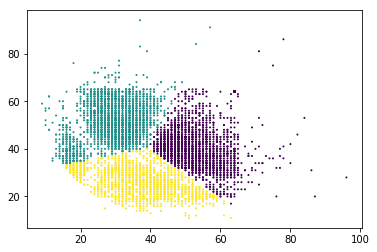

In [26]:
plt.scatter(sizes[:,0],sizes[:,1],c=kmeans.labels_,s=1)

In [18]:
from sklearn.cluster import KMeans
import numpy as np
X = sizes
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
kmeans.labels_

kmeans.predict([[0, 0], [4, 4]])

kmeans.cluster_centers_




array([[ 53.57159857,  42.28639429],
       [ 29.47927551,  51.27168234],
       [ 37.15496912,  26.17125211]])

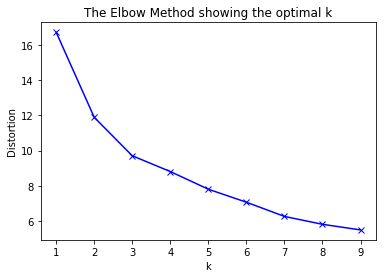

In [17]:
 
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
 
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [27]:
all_imgs[1]

{'filename': '/home/staff1/ctorney/workspace/deepWildCount/yolo_v3/train/train_images/SWC1367-1.JPG',
 'height': 864,
 'object': [],
 'width': 864}